# Assignment8

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

# How Much is Your Car Worth?

Data about the retail price of 2005 General Motors cars can be found in `car_data.csv`.

The columns are:

1. Price: suggested retail price of the used 2005 GM car in excellent condition.
2. Mileage: number of miles the car has been driven
3. Make: manufacturer of the car such as Saturn, Pontiac, and Chevrolet
4. Model: specific models for each car manufacturer such as Ion, Vibe, Cavalier
5. Trim (of car): specific type of car model such as SE Sedan 4D, Quad Coupe 2D          
6. Type: body type such as sedan, coupe, etc.      
7. Cylinder: number of cylinders in the engine        
8. Liter: a more specific measure of engine size     
9. Doors: number of doors           
10. Cruise: indicator variable representing whether the car has cruise control (1 = cruise)
11. Sound: indicator variable representing whether the car has upgraded speakers (1 = upgraded)
12. Leather: indicator variable representing whether the car has leather seats (1 = leather)

## Tasks, Part 1

1. Find the linear regression equation for mileage vs price.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

## Tasks, Part 2

1. Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
2. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
3. Find the combination of the factors that is the best predictor for price.

## Tasks, Hard Mode

1. Research dummy variables in scikit-learn to see how to use the make, model, and body type.
2. Find the best combination of factors to predict price.

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model, pipeline, preprocessing

import pylab as pl
import itertools
df = pd.read_csv("car_data.csv")
print(df.describe())
print(df.head())

              Price       Mileage    Cylinder       Liter       Doors  \
count    804.000000    804.000000  804.000000  804.000000  804.000000   
mean   21343.143767  19831.934080    5.268657    3.037313    3.527363   
std     9884.852801   8196.319707    1.387531    1.105562    0.850169   
min     8638.930895    266.000000    4.000000    1.600000    2.000000   
25%    14273.073870  14623.500000    4.000000    2.200000    4.000000   
50%    18024.995019  20913.500000    6.000000    2.800000    4.000000   
75%    26717.316636  25213.000000    6.000000    3.800000    4.000000   
max    70755.466717  50387.000000    8.000000    6.000000    4.000000   

           Cruise       Sound     Leather  
count  804.000000  804.000000  804.000000  
mean     0.752488    0.679104    0.723881  
std      0.431836    0.467111    0.447355  
min      0.000000    0.000000    0.000000  
25%      1.000000    0.000000    0.000000  
50%      1.000000    1.000000    1.000000  
75%      1.000000    1.000000    1

In [3]:
print("checking for null values")
print(df.isnull().sum())
print("Sum of dupilicat rows and columns")
print(df.duplicated().sum())

checking for null values
Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64
Sum of dupilicat rows and columns
0


In [6]:
x = df[['Mileage']]
y = df[['Price']]
linreg = linear_model.LinearRegression()
linreg.fit(x, y)
print('intercept:', linreg.intercept_)
print('coefficients:', linreg.coef_)
print('r-squared:', linreg.score(x, y))

intercept: [24764.55900606]
coefficients: [[-0.1725205]]
r-squared: 0.02046344732348926


Text(0.5, 1.0, 'Mileage vs Price')

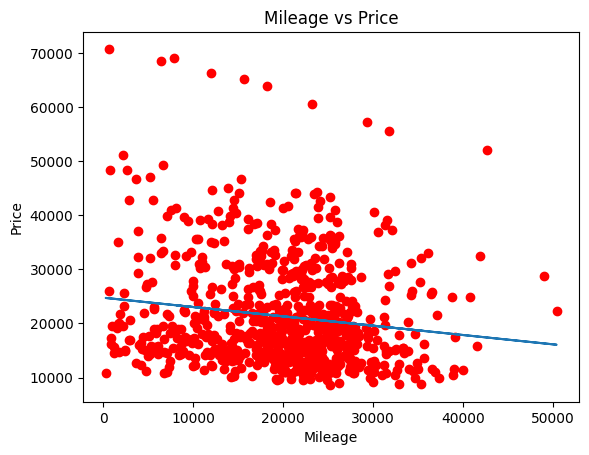

In [7]:
plt.scatter(x, y, color='r')
plt.plot(x, linreg.predict(x))
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.title('Mileage vs Price')

In [8]:
print('r-squared: ', linreg.score(x, y))
#no strong corelation 

r-squared:  0.02046344732348926


In [36]:
# task 2 
feature = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather']
x = df[feature]
y = df[['Price']]
linreg = linear_model.LinearRegression()
linreg.fit(x, y)
print('intercept:', linreg.intercept_)
print('coefficients:', linreg.coef_)

intercept: [6758.7551436]
coefficients: [[-1.69747832e-01  3.79237893e+03 -7.87220732e+02 -1.54274585e+03
   6.28899715e+03 -1.99379528e+03  3.34936162e+03]]


In [37]:
#finding R square
print('r-squared: ', linreg.score(x, y))

r-squared:  0.446264353672838


0.44 is not strong corelation 

In [38]:

combos = []
   
for i in range(1, 11):
    combos.append(itertools.combinations(feature, i))

check_score = 0
for combin in combos:
    for groupx in combin:
        groupx = list(groupx)
        x = df[groupx]
        degrees = 8
        
        for degree in range(degrees):
            model = pipeline.Pipeline([
                    ('poly', preprocessing.PolynomialFeatures(degree=degree)),
                    ('linear', linear_model.LinearRegression(fit_intercept=False))])
            
            model = model.fit(x,y)
            model_score = model.score(x, y)
        if check_score < model.score(x, y):
            check_score = model.score(x, y)
            maxgroup = groupx
            best_degree = degree
            
print(degree, maxgroup, check_score)

7 ['Cylinder', 'Liter', 'Doors', 'Sound', 'Leather'] 0.9083246745184897


In [21]:
#Task 3
df_with_dummies = pd.get_dummies(df, columns = ['Make', 'Model', 'Type'])
print(df.groupby(["Make"]).sum())
print(df.groupby(["Type"]).sum())

                  Price  Mileage  Cylinder  Liter  Doors  Cruise  Sound  \
Make                                                                      
Buick      1.665209e+06  1634248       480  293.0    320      80     53   
Cadillac   3.274907e+06  1512685       600  351.0    300      80     44   
Chevrolet  5.256832e+06  6289788      1600  918.0   1080     191    265   
Pontiac    2.761815e+06  2898099       840  495.0    540     113     91   
SAAB       3.362396e+06  2389910       456  245.0    396     114     66   
Saturn     8.387285e+05  1220145       260  140.0    200      27     27   

           Leather  
Make                
Buick           35  
Cadillac        80  
Chevrolet      259  
Pontiac         96  
SAAB            83  
Saturn          29  
                    Price  Mileage  Cylinder   Liter  Doors  Cruise  Sound  \
Type                                                                         
Convertible  2.041585e+06  1035233       280   166.0    100      50     30 

C:\Users\dhana\AppData\Local\Temp\ipykernel_11096\1983508645.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby(["Make"]).sum())
C:\Users\dhana\AppData\Local\Temp\ipykernel_11096\1983508645.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby(["Type"]).sum())


In [28]:
columns = ['Mileage', 'Cylinder', 'Liter', 'Doors', 'Cruise', 'Sound', 'Leather', 'Make_Buick', 'Make_Chevrolet', 'Make_Pontiac', 'Make_SAAB', 'Make_Cadillac', 'Make_Saturn','Type_Sedan', 'Type_Coupe', 'Type_Wagon', 'Type_Hatchback', 'Type_Convertible']
X = df_with_dummies[columns]
y = df_with_dummies['Price']
regr= LinearRegression()
regr.fit(X, y)
print('Intercept:', regr.intercept_)
print('Coefficient:',regr.coef_)
print('Score:', regr.score(X, y))

Intercept: 23983.771909616768
Coefficient: [-1.84862466e-01 -1.22610774e+03  5.76120797e+03 -2.06693208e+03
  1.11145653e+02  2.95622523e+02  2.34258573e+02 -3.58669276e+03
 -5.33495094e+03 -5.47974129e+03  6.95098389e+03  1.22732515e+04
 -4.82285042e+03 -1.69110942e+03 -5.49471851e+03  2.37758514e+03
 -1.71994175e+03  6.52818455e+03]
Score: 0.9363889951039477


In [35]:
combos = []
   
for i in range(1, 11):
    combos.append(itertools.combinations(X, i))

check_score = 0
storage={}
for combin in combos:
    for groupx in combin:
        groupx = list(groupx)
        x = X[groupx]
        degrees = 1
        
        for degree in range(degrees):
            model = pipeline.Pipeline([
                    ('poly', preprocessing.PolynomialFeatures(degree=degree)),
                    ('linear', linear_model.LinearRegression(fit_intercept=False))])
            
            model = model.fit(x,y)
            model_score = model.score(x, y)
            storage=dict([(1,degree),(2,groupx),(3,model_score)])
        """if check_score < model.score(x, y):
            check_score = model.score(x, y)
            maxgroup = groupx
            best_degree = degree"""
Key_max = max(zip(storage.values(), storage.keys()))[3]  
print(Key_max)

KeyboardInterrupt: 